In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import numpy as np
import datetime 
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv('BD_LAB_EXAMPLE_SAMPLE.csv', encoding='windows-1251')

In [115]:
df = df[df.LAT != '.']
df.head()
df['LAT'] = df['LAT'].astype('float32')
df['LON'] = df['LON'].astype('float32')

In [116]:
flo = ['cost', 'call_duration_minutes', 'data_volume_mb']
for ff in flo:
    df[ff] = df[ff].astype('float32')

In [117]:
cat = ['hash_number_A', 'hash_tariff', 'event', 'event_sub', 'network_service_direction', 'hash_number_B', 'number_B_category', 
 'hash_accum_code', 'device_type', 'phone_price_category', 'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5']
for cc in cat:
    df[cc] = df[cc].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309551 entries, 14321 to 1327628
Data columns (total 21 columns):
hash_number_A                1309551 non-null category
hash_tariff                  1309551 non-null category
event                        1309551 non-null category
event_sub                    1309551 non-null category
network_service_direction    1309551 non-null category
event_start_date             1309551 non-null object
LAT                          1309551 non-null float32
LON                          1309551 non-null float32
cost                         1309551 non-null float32
hash_number_B                1309551 non-null category
number_B_category            23520 non-null category
call_duration_minutes        1309551 non-null float32
data_volume_mb               1309551 non-null float32
hash_accum_code              1309551 non-null category
device_type                  1233990 non-null category
phone_price_category         1309551 non-null category
interest_1  

In [118]:
# Time 
time = []
for tim in df['event_start_date']:
    tim1 = datetime.datetime.strptime(tim, "%d%b%y:%H:%M:%S")
    time.append(tim1)
df['time'] = time
df.head()
#Reassign time and del time column
df.event_start_date = df.time
del df['time']

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309551 entries, 14321 to 1327628
Data columns (total 21 columns):
hash_number_A                1309551 non-null category
hash_tariff                  1309551 non-null category
event                        1309551 non-null category
event_sub                    1309551 non-null category
network_service_direction    1309551 non-null category
event_start_date             1309551 non-null datetime64[ns]
LAT                          1309551 non-null float32
LON                          1309551 non-null float32
cost                         1309551 non-null float32
hash_number_B                1309551 non-null category
number_B_category            23520 non-null category
call_duration_minutes        1309551 non-null float32
data_volume_mb               1309551 non-null float32
hash_accum_code              1309551 non-null category
device_type                  1233990 non-null category
phone_price_category         1309551 non-null category
inte

In [120]:
df.columns

Index(['hash_number_A', 'hash_tariff', 'event', 'event_sub',
       'network_service_direction', 'event_start_date', 'LAT', 'LON', 'cost',
       'hash_number_B', 'number_B_category', 'call_duration_minutes',
       'data_volume_mb', 'hash_accum_code', 'device_type',
       'phone_price_category', 'interest_1', 'interest_2', 'interest_3',
       'interest_4', 'interest_5'],
      dtype='object')

In [121]:
#updated
gelist = ['Краковець', 'Устилуг', 'Ягодин', 'Володимир-Волинський', 'Ізов', 
          'Рава-Руська', 'Шегині', 'Хирів', 'Смільниця', 'Грушів', 'Мостиська', 'Угринів', 'Малі Селменці', 'Малий Березний', 'Ужгород', 'Чоп', 'Чоп (Тиса)', 'Батьово', 'Обава', 'Вилок', 'Солотвино', 'Тересва', 'Ділове', 'Вадул-Сірет', 'Тереблечье']

In [122]:
aeroports= ['Аеропорт Львів', 'Аеропорт Івано-Франківськ', 'Аеропорт Ужгород', 'Аеропорт Вінниця', 'Аеропорт Рівне', 'Аеропорт Бориспіль', 'Аеропорт Жуляни']

In [123]:
df_coord_aero = pd.DataFrame(columns = ['Name', 'LAT', 'LON'])
list_aero = []
#coordinates of border points

geolocator = Nominatim()
for i in aeroports:
    location = geolocator.geocode([i])
    df_coord_aero = df_coord_aero.append({'Name': i, 'LAT': location.latitude, 'LON': location.longitude}, ignore_index=True)
    coord_list = [location.latitude, location.longitude]
    list_aero.append(coord_list)
    print(i,location.latitude, location.longitude)
#df_coord.head()
#listoflist

Аеропорт Львів 49.816859 23.9556777
Аеропорт Івано-Франківськ 48.8874942 24.7068570398593
Аеропорт Ужгород 48.63564795 22.2608109329465
Аеропорт Вінниця 49.24449805 28.6061128545766
Аеропорт Рівне 50.60573855 26.1489586264805
Аеропорт Бориспіль 50.34194995 30.8937737161199
Аеропорт Жуляни 50.4068453 30.4455115281123


In [124]:
df_coord = pd.DataFrame(columns = ['Name', 'LAT', 'LON'])
listoflist = []
#coordinates of border points

geolocator = Nominatim()
for i in gelist:
    location = geolocator.geocode([i])
    df_coord = df_coord.append({'Name': i, 'LAT': location.latitude, 'LON': location.longitude}, ignore_index=True)
    coord_list = [location.latitude, location.longitude]
    listoflist.append(coord_list)
    #print(i,location.latitude, location.longitude)
#df_coord.head()
#listoflist

In [ ]:
df_coord

In [125]:
border_checkpoint_coords = listoflist # CHANGE IT!!! List of tuples with border checkpoints coordinates
radius = 0.012 # CHANGE IT !!!! radius in decimal points equal to 1 km
def check_coords(point_coord):
    """
    Input [LAT, LON] list with Latitude and Longitude of a point
    Returns True if point_coords fits to circle around a border checkpoint
    with radius 1 km
    """
    for checkpoint_coord in border_checkpoint_coords:
        if (point_coord[0] - checkpoint_coord[0])**2 + (point_coord[1] - checkpoint_coord[1])**2 <= radius**2:
            return True
    return False

In [126]:
#This is a genius's work
df_border = df[df.apply(lambda r: check_coords((r.LAT, r.LON)), axis = 1)]
len(df_border)

40111

In [127]:
len(df_border['hash_number_A'].unique()), len(df['hash_number_A'].unique())

(214, 983)

In [128]:
df_border['hash_number_A'].unique()

[2536051, 1874226, 1995680, 1786975, 1777244, ..., 2003159, 1791083, 1876182, 1873973, 1787758]
Length: 214
Categories (214, int64): [2536051, 1874226, 1995680, 1786975, ..., 1791083, 1876182, 1873973, 1787758]

In [129]:
#unique values to list 
border_set = set(df_border['hash_number_A'].tolist())
len(border_set)

214

In [130]:
df_border.head(50)

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5
14381,2536051,231925,network_ser,international_voice,Incoming,2017-08-11 01:34:20,48.869331,22.443110,0.0000,96630,...,0.166667,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14474,2536051,231925,network_ser,international_voice,Outgoing,2017-08-06 22:11:18,48.869331,22.443110,0.9999,98255,...,2.000000,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14475,2536051,231925,network_ser,international_voice,Outgoing,2017-07-14 22:32:38,48.869331,22.443110,0.0000,98255,...,19.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14476,2536051,231925,network_ser,international_voice,Outgoing,2017-07-19 22:35:05,48.869331,22.443110,0.0000,98255,...,1.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14477,2536051,231925,network_ser,international_voice,Outgoing,2017-07-19 23:57:46,48.869331,22.443110,0.0000,98255,...,7.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14478,2536051,231925,network_ser,international_voice,Outgoing,2017-07-19 22:07:33,48.869331,22.443110,0.0000,98255,...,1.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14480,2536051,231925,network_ser,international_voice,Outgoing,2017-08-06 22:15:17,48.869331,22.443110,0.4999,98382,...,1.000000,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14481,2536051,231925,network_ser,international_voice,Outgoing,2017-08-06 22:13:53,48.869331,22.443110,0.4999,98382,...,1.000000,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14483,2536051,231925,network_ser,international_voice,Outgoing,2017-08-19 23:57:25,48.869331,22.443110,0.0000,98382,...,9.000000,0.0,267,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14484,2536051,231925,network_ser,international_voice,Outgoing,2017-07-15 21:38:29,48.869331,22.443110,0.4999,98382,...,7.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech


In [131]:
interes = ['Новости и СМИ', 'Бизнес и экономика', 'Hi-Tech']
#reset indexes to column nymbers
set1 = df_border[(df_border['interest_1'].isin(interes)) | (df_border['interest_2'].isin(interes)) | (df_border['interest_3'].isin(interes)) | (df_border['interest_4'].isin(interes))]['hash_number_A'].value_counts().to_frame().reset_index()
set1.columns = ['hash_number_A', 'counts']
set1 = set1[set1['counts'] > 0]
len(set1)

#df_set train['Native region'].value_counts()
#train['Education years'].groupby(train['Education level']).mean()

94

In [132]:
set1.tail()

,hash_number_A,counts
89,1787758,1
90,2003159,1
91,1879231,1
92,1990288,1
93,1992693,1


In [133]:
len(set1)

94

<Container object of 199 artists>

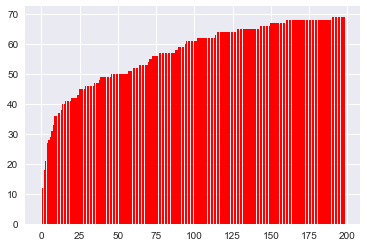

In [134]:
ll = []
for i in range(1,200):
        ll.append(len(set1[set1['counts'] < i]))
ll = pd.Series(ll)
plt.bar(ll.index, ll, color = 'red')

111

In [136]:
len(dfn)

244548

In [135]:
#initial dataset with the border-filtered visitors filtered 
dfn = df[df['hash_number_A'].isin(set1.hash_number_A.tolist())]

In [297]:
#SUPERB CODE
lat1 = []
lon1 = []
for i in dfn['hash_number_A'].unique():
    df_temp = dfn[dfn['hash_number_A'] == i]
    lat = df_temp['LAT'].mean()
    lon = df_temp['LON'].mean()
    lat1.append(lat)
    lon1.append(lon)

In [147]:
latitudes1 = dfn['LAT'].tolist()
longitudes1 = dfn['LON'].tolist()

In [102]:
len(dfn['hash_number_A'].unique())

111

In [291]:
gmap = gmplot.GoogleMapPlotter(lat[0],lon[0],18)
gmap.scatter(lat1,lon1, 'r', 0.1, marker=False)
gmap.draw('map_target.html')

TypeError: 'float' object is not subscriptable

In [ ]:


import gmplot

#gmap = gmplot.GoogleMapPlotter(location.latitude, location.longitude, 5)
gmap = gmplot.GoogleMapPlotter(latitudes1[0],longitudes1[0], 10)
#gmap.scatter(lat1, lon1, 'r', 1000, marker=False)
#gmap.scatter(latitudes1, longitudes1, 'r', 1000, marker=False)
gmap.heatmap(latitudes1, longitudes1)

#gmap.heatmap(lat1, lon1)
gmap.draw(htmlfile= 'where.html')

In [ ]:
#Date of week
datetime.datetime.today()
datetime.datetime(2012, 3, 23, 23, 24, 55, 173504)
datetime.datetime.today().weekday()

In [151]:
address = []
for i in dfn.iterrows:
    address.append(geolocator.reverse(i.LAT, i.LON))

TypeError: 'method' object is not iterable

In [17]:
df_border = df[df.apply(lambda r: check_coords((r.LAT, r.LON)), axis = 1)]

NameError: name 'geolocator' is not defined

In [180]:
df['hash_number_A'].groupby(df['hash_number_A'].unique()).sum()

ValueError: Categorical dtype grouper must have len(grouper) == len(data)